# Lab 8:
> Centroid Visualization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [4]:
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([
    [1, 0.3],
    [0.3, 1]
])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100)

mean_02 = np.array([6.0, 7.0])
cov_02 =  np.array([
    [1.5, 0.3],
    [0.3, 1]
])
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100)

mean_03 = np.array([7.0, -5.0])
cov_03 =  np.array([
    [1.2, 0.5],
    [0.5, 1.3]
])
dist_03 = np.random.multivariate_normal(mean_03, cov_03, 100)

mean_04 = np.array([2.0, -7.0])
cov_04 =  np.array([
    [1.2, 0.5],
    [0.5, 1.3]
])
dist_04 = np.random.multivariate_normal(mean_04, cov_04, 100)

data = np.vstack((dist_01, dist_02, dist_03, dist_04))
np.random.shuffle(data)

In [9]:
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker='.', color='gray', label='data points')
    plt.scatter(centroids[:-1, 0], centroids[:-1,1], color='black', label='previously selected centroids')
    plt.scatter(centroids[-1, 0], centroids[-1,1], color='red', label='next centroid')
    plt.title(f"Select {centroids.shape[0]} th centroid")
    
    plt.legend()
    plt.xlim(-5,12)
    plt.ylim(-10, 15)
    plt.show()

In [6]:
def distance(p1, p2):
    return np.sum((p1-p2)**2)

In [11]:
def initialize(data, k):
    centroids = []
    centroids.append(data[np.random.randint(data.shape[0]), :])
    plot(data, np.array(centroids))
    for c_id in range(k-1):
        dist = []
        for i in range(data.shape[0]):
            point = data[i,:]
            d = sys.maxsize
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
        plot(data, np.array(centroids))
    return centroids

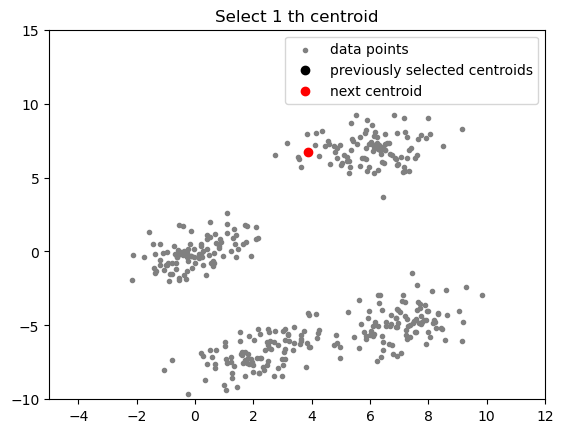

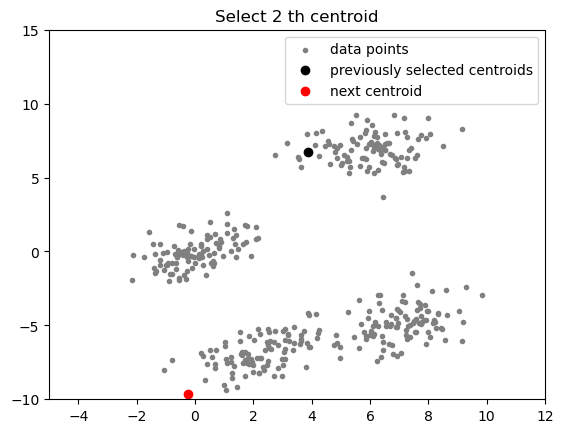

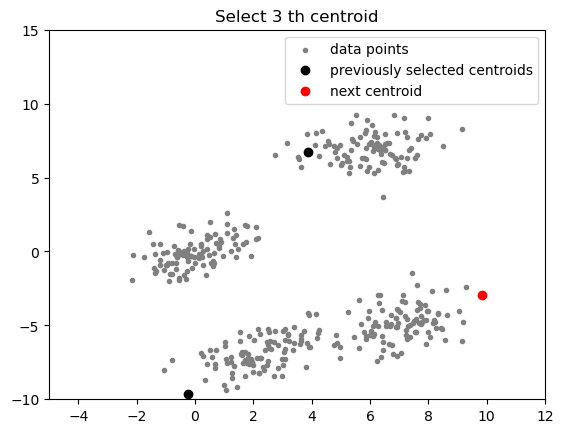

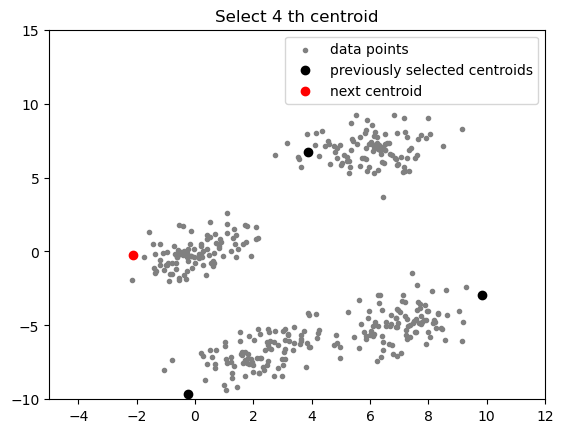

In [12]:
centroids = initialize(data, k=4)